In [1]:
# loading required libraries
import pandas as pd
import numpy as np
# Display all columns
pd.set_option('display.max_columns', None)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Checking for stationarity for the time series data
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.stattools import grangercausalitytests

import warnings
# Filter out warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR

# ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf



In [2]:
# loading the data
df=pd.read_csv('entire_data.csv')
df

,Date,fx rate,Uganda_imports,Tanzania_imports,Zambia_imports,Egypt_imports,S.Africa_imports,Zimbabwe_imports,Other_Africa_imports,UK_imports,USA_imports,Germany_imports,Italy_imports,UAE_imports,S.Arabia_imports,France_imports,India_imports,Japan_imports,Other_World_imports,UK_exports,Germany_exports,USA_exports,Netherlands_exports,Pakistan_exports,France_exports,Belgium_exports,Other_World_exports,Uganda_exports,Tanzania_exports,Zambia_exports,Egypt_exports,Rwanda_exports,Zimbabwe_exports,Ethiopia_exports,Somalia_exports,S.Africa_exports,DRC_exports,Other_Africa_exports
0,2023-12-01,154.09,2134,3470,340,4359,5125,450,3745,2435,8453,3382,1709,31030,5007,2500,19295,8877,131851,5148,929,5731,6758,7293,1263,442,39107,9536,5557,737,2475,3286,268,1472,1420,443,2283,6562
1,2023-11-01,152.03,4265,3816,533,4053,5969,203,5310,8551,9670,2942,1568,31670,11745,3479,19455,10643,153420,4558,972,5675,5863,8100,1178,365,43142,9675,6759,944,2689,3726,356,1254,1523,1020,3108,6786
2,2023-10-01,149.40,2728,3724,788,5526,7847,284,5504,3322,9147,2879,1449,41919,10269,4833,33670,7510,118037,5017,900,3965,5710,6632,1383,399,39296,9990,7437,879,3447,3652,301,1352,1918,548,2246,7511
3,2023-09-01,146.77,3092,3684,1053,3889,4690,54,4868,2810,7685,2769,1733,41587,18522,4814,17757,8610,104620,4348,1204,4232,5789,8451,1746,494,43614,11653,6972,781,2685,3662,218,929,2255,344,2668,7131
4,2023-08-01,143.93,3419,4297,1156,4185,6338,372,4700,2829,13390,3498,2586,50048,9073,3935,19228,8398,119500,4615,1348,5644,6580,9898,1575,597,41957,12170,6490,1007,3394,4226,162,1214,1654,1397,3076,7216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1998-05-01,62.60,12,39,2,16,942,16,26,1836,3737,732,408,779,726,393,695,1198,6030,1722,749,363,454,489,185,134,3717,1467,1267,11,541,150,38,105,176,64,175,509
308,1998-04-01,59.61,5,33,14,9,1247,12,68,1582,2070,700,342,1241,594,1066,906,1219,6313,1373,634,228,538,661,144,263,3744,1629,1150,13,611,177,51,135,100,248,216,450
309,1998-03-01,60.13,6,79,18,18,1283,46,26,1987,2800,807,399,623,1119,698,554,1332,6665,1571,471,454,499,684,144,113,3260,1479,1131,16,708,141,64,172,172,57,169,483
310,1998-02-01,60.52,4,25,8,17,1224,142,65,1725,689,948,432,1919,1213,585,517,1057,6251,1465,243,354,450,843,237,139,3063,1205,1206,9,440,273,26,102,97,52,210,391


In [3]:
df.columns

Index(['Date', 'fx rate', 'Uganda_imports', 'Tanzania_imports',
       'Zambia_imports', 'Egypt_imports', 'S.Africa_imports',
       'Zimbabwe_imports', 'Other_Africa_imports', 'UK_imports', 'USA_imports',
       'Germany_imports', 'Italy_imports', 'UAE_imports', 'S.Arabia_imports',
       'France_imports', 'India_imports', 'Japan_imports',
       'Other_World_imports', 'UK_exports', 'Germany_exports', 'USA_exports',
       'Netherlands_exports', 'Pakistan_exports', 'France_exports',
       'Belgium_exports', 'Other_World_exports', 'Uganda_exports',
       'Tanzania_exports', 'Zambia_exports', 'Egypt_exports', 'Rwanda_exports',
       'Zimbabwe_exports', 'Ethiopia_exports', 'Somalia_exports',
       'S.Africa_exports', 'DRC_exports', 'Other_Africa_exports'],
      dtype='object')

### Rearranging the data set into Continents

In [4]:
# Africa imports
africa_imports = df[['Uganda_imports', 'Tanzania_imports', 'Zambia_imports', 'Egypt_imports', 'S.Africa_imports', 'Zimbabwe_imports', 'Other_Africa_imports']]
df['Africa_imports'] = africa_imports.sum(axis=1)
df.drop(columns=africa_imports.columns, inplace=True)

# Africa exports
africa_exports = df[['Uganda_exports', 'Tanzania_exports', 'Zambia_exports', 'Egypt_exports', 'Rwanda_exports', 'Zimbabwe_exports', 'Ethiopia_exports', 'Somalia_exports', 'S.Africa_exports', 'DRC_exports', 'Other_Africa_exports']]
df['Africa_exports'] = africa_exports.sum(axis=1)
df.drop(columns=africa_exports.columns, inplace=True)

# Europe imports
europe_imports = df[['UK_imports', 'Germany_imports', 'Italy_imports', 'France_imports']]
df['Europe_imports'] = europe_imports.sum(axis=1)
df.drop(columns=europe_imports.columns, inplace=True)

# Europe exports
europe_exports = df[['UK_exports', 'Germany_exports', 'Netherlands_exports', 'France_exports', 'Belgium_exports']]
df['Europe_exports'] = europe_exports.sum(axis=1)
df.drop(columns=europe_exports.columns, inplace=True)

# Asia imports
asia_imports = df[['UAE_imports', 'S.Arabia_imports', 'India_imports', 'Japan_imports']]
df['Asia_imports'] = asia_imports.sum(axis=1)
df.drop(columns=asia_imports.columns, inplace=True)

# Asia exports
asia_exports = df[['Pakistan_exports']]
df['Asia_exports'] = asia_exports.sum(axis=1)
df.drop(columns=asia_exports.columns, inplace=True)

In [5]:
# Reorder columns if needed
df = df[['Date', 'fx rate','Africa_imports','USA_imports','Europe_imports','Asia_imports','Other_World_imports','Africa_exports','USA_exports','Europe_exports','Asia_exports', 'Other_World_exports']]
df

# Setting the index as the date
df=df.set_index('Date')
df

,fx rate,Africa_imports,USA_imports,Europe_imports,Asia_imports,Other_World_imports,Africa_exports,USA_exports,Europe_exports,Asia_exports,Other_World_exports
Date,,,,,,,,,,,
2023-12-01,154.09,19623,8453,10026,64209,131851,34039,5731,14540,7293,39107
2023-11-01,152.03,24149,9670,16540,73513,153420,37840,5675,12936,8100,43142
2023-10-01,149.40,26401,9147,12483,93368,118037,39281,3965,13409,6632,39296
2023-09-01,146.77,21330,7685,12126,86476,104620,39298,4232,13581,8451,43614
2023-08-01,143.93,24467,13390,12848,86747,119500,42006,5644,14715,9898,41957
...,...,...,...,...,...,...,...,...,...,...,...
1998-05-01,62.60,1053,3737,3369,3398,6030,4503,363,3244,489,3717
1998-04-01,59.61,1388,2070,3690,3960,6313,4780,228,2952,661,3744
1998-03-01,60.13,1476,2800,3891,3628,6665,4592,454,2798,684,3260


In [6]:
df.to_csv('Continent.csv',index=True)

## Checking for correlation

<Axes: >

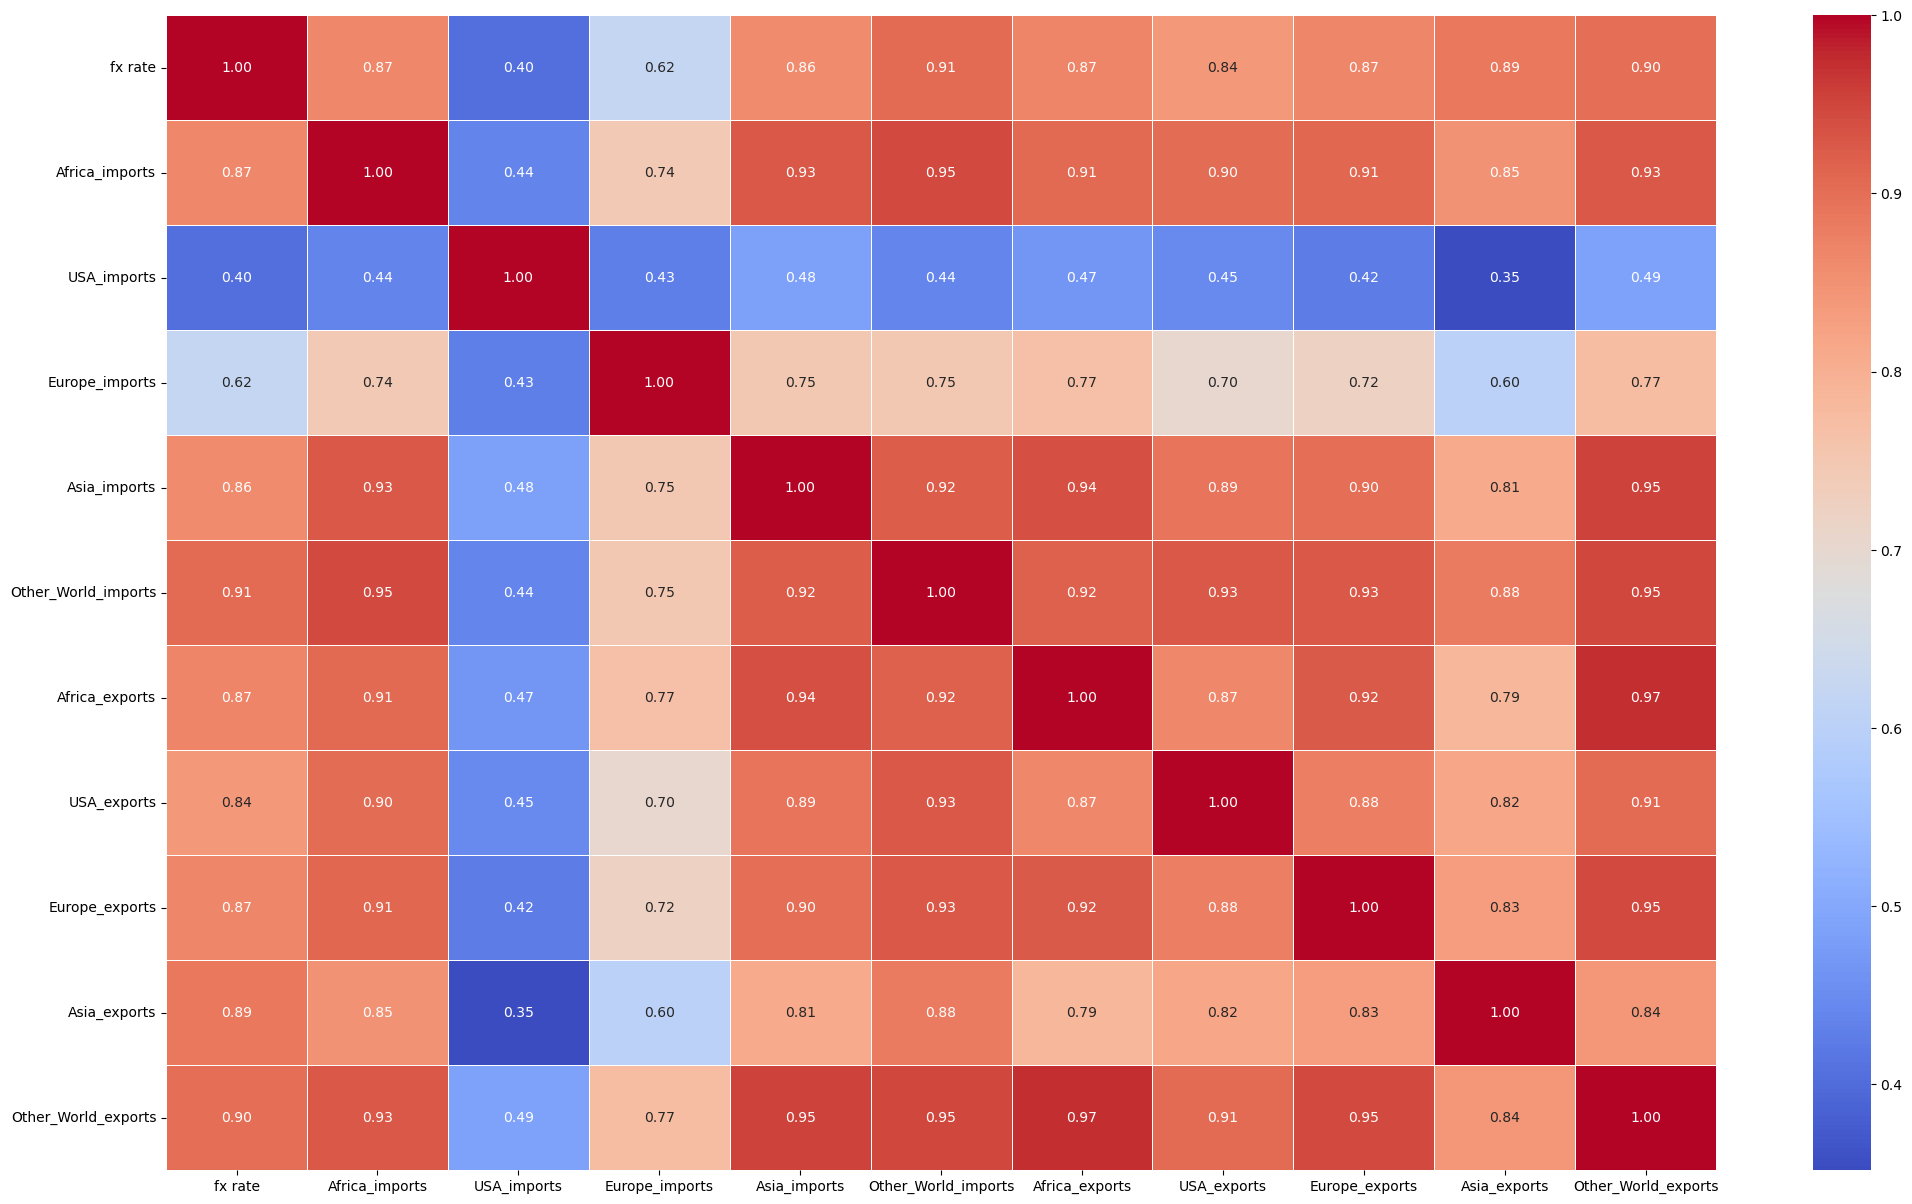

In [7]:
# checking the correlation
corr = df.corr()

# Drawing a heat map
# Set the figure size
plt.figure(figsize=(25, 15))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)


## Granger Causality Test

In [8]:
## Testing for stationarity
# Perform ADF test for each column
for column in df.columns:
    result = adfuller(df[column].dropna())
    print(f'ADF Statistic for {column}: {result[0]}')
    print(f'p-value for {column}: {result[1]}')
    print(f'Critical Values for {column}:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    
    # Conclusion
    if result[1] <= 0.05:
        print(f'{column} is stationary (reject null hypothesis)')
    else:
        print(f'{column} is non-stationary (fail to reject null hypothesis)')
        
    print('-------------------------------------')


ADF Statistic for fx rate: -3.200432852094084
p-value for fx rate: 0.0199596377074847
Critical Values for fx rate:
	1%: -3.45176116018037
	5%: -2.870970093607691
	10%: -2.571794416006072
fx rate is stationary (reject null hypothesis)
-------------------------------------
ADF Statistic for Africa_imports: -1.5337823243558306
p-value for Africa_imports: 0.516738470988596
Critical Values for Africa_imports:
	1%: -3.452045317832011
	5%: -2.871094805558846
	10%: -2.571860921485457
Africa_imports is non-stationary (fail to reject null hypothesis)
-------------------------------------
ADF Statistic for USA_imports: -2.155568686838996
p-value for USA_imports: 0.22276462326252894
Critical Values for USA_imports:
	1%: -3.452713099849546
	5%: -2.871387839457783
	10%: -2.5720171933352485
USA_imports is non-stationary (fail to reject null hypothesis)
-------------------------------------
ADF Statistic for Europe_imports: -1.1309857973225048
p-value for Europe_imports: 0.702558313027423
Critical Val

In [9]:
# List to store non-stationary columns
non_stationary_columns = []

# Perform ADF test for each column
for column in df.columns:
    result = adfuller(df[column].dropna())
    p_value = result[1]
    
    # If p-value is greater than 0.05, add column to non-stationary list
    if p_value > 0.05:
        non_stationary_columns.append(column)

# Print non-stationary columns
print("Non-stationary columns:")
for column in non_stationary_columns:
    print(column)

Non-stationary columns:
Africa_imports
USA_imports
Europe_imports
Asia_imports
Other_World_imports
Africa_exports
USA_exports
Europe_exports
Asia_exports
Other_World_exports


In [10]:
# Difference the non-stationary columns and add them back to the original dataset with the "_diff" suffix
for column in non_stationary_columns:
    df[column + '_diff'] = df[column].diff()

# Print the first few rows of the updated dataset
df

,fx rate,Africa_imports,USA_imports,Europe_imports,Asia_imports,Other_World_imports,Africa_exports,USA_exports,Europe_exports,Asia_exports,Other_World_exports,Africa_imports_diff,USA_imports_diff,Europe_imports_diff,Asia_imports_diff,Other_World_imports_diff,Africa_exports_diff,USA_exports_diff,Europe_exports_diff,Asia_exports_diff,Other_World_exports_diff
Date,,,,,,,,,,,,,,,,,,,,,
2023-12-01,154.09,19623,8453,10026,64209,131851,34039,5731,14540,7293,39107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-11-01,152.03,24149,9670,16540,73513,153420,37840,5675,12936,8100,43142,4526.0,1217.0,6514.0,9304.0,21569.0,3801.0,-56.0,-1604.0,807.0,4035.0
2023-10-01,149.40,26401,9147,12483,93368,118037,39281,3965,13409,6632,39296,2252.0,-523.0,-4057.0,19855.0,-35383.0,1441.0,-1710.0,473.0,-1468.0,-3846.0
2023-09-01,146.77,21330,7685,12126,86476,104620,39298,4232,13581,8451,43614,-5071.0,-1462.0,-357.0,-6892.0,-13417.0,17.0,267.0,172.0,1819.0,4318.0
2023-08-01,143.93,24467,13390,12848,86747,119500,42006,5644,14715,9898,41957,3137.0,5705.0,722.0,271.0,14880.0,2708.0,1412.0,1134.0,1447.0,-1657.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998-05-01,62.60,1053,3737,3369,3398,6030,4503,363,3244,489,3717,-521.0,2858.0,-664.0,-1335.0,-800.0,-499.0,79.0,-43.0,-391.0,91.0
1998-04-01,59.61,1388,2070,3690,3960,6313,4780,228,2952,661,3744,335.0,-1667.0,321.0,562.0,283.0,277.0,-135.0,-292.0,172.0,27.0
1998-03-01,60.13,1476,2800,3891,3628,6665,4592,454,2798,684,3260,88.0,730.0,201.0,-332.0,352.0,-188.0,226.0,-154.0,23.0,-484.0


In [11]:
# Filter out non-stationary columns from the data
stationary_data = df.loc[:, ~df.columns.isin(non_stationary_columns)]

# Dropping the null values from the stationary data
stationary_data=stationary_data.dropna()
stationary_data

,fx rate,Africa_imports_diff,USA_imports_diff,Europe_imports_diff,Asia_imports_diff,Other_World_imports_diff,Africa_exports_diff,USA_exports_diff,Europe_exports_diff,Asia_exports_diff,Other_World_exports_diff
Date,,,,,,,,,,,
2023-11-01,152.03,4526.0,1217.0,6514.0,9304.0,21569.0,3801.0,-56.0,-1604.0,807.0,4035.0
2023-10-01,149.40,2252.0,-523.0,-4057.0,19855.0,-35383.0,1441.0,-1710.0,473.0,-1468.0,-3846.0
2023-09-01,146.77,-5071.0,-1462.0,-357.0,-6892.0,-13417.0,17.0,267.0,172.0,1819.0,4318.0
2023-08-01,143.93,3137.0,5705.0,722.0,271.0,14880.0,2708.0,1412.0,1134.0,1447.0,-1657.0
2023-07-01,141.45,1127.0,-2100.0,-2744.0,-19809.0,-23988.0,-4978.0,1165.0,-863.0,-4641.0,-5419.0
...,...,...,...,...,...,...,...,...,...,...,...
1998-05-01,62.60,-521.0,2858.0,-664.0,-1335.0,-800.0,-499.0,79.0,-43.0,-391.0,91.0
1998-04-01,59.61,335.0,-1667.0,321.0,562.0,283.0,277.0,-135.0,-292.0,172.0,27.0
1998-03-01,60.13,88.0,730.0,201.0,-332.0,352.0,-188.0,226.0,-154.0,23.0,-484.0


In [12]:
# Defining a function to perform granger causality
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


In [13]:
grangers_causation_matrix(stationary_data, variables = stationary_data.columns) 


,fx rate_x,Africa_imports_diff_x,USA_imports_diff_x,Europe_imports_diff_x,Asia_imports_diff_x,Other_World_imports_diff_x,Africa_exports_diff_x,USA_exports_diff_x,Europe_exports_diff_x,Asia_exports_diff_x,Other_World_exports_diff_x
fx rate_y,1.0000,0.0074,0.0057,0.6739,0.1022,0.6431,0.6869,0.5300,0.2381,0.1281,0.3596
Africa_imports_diff_y,0.0204,1.0000,0.2351,0.4282,0.0120,0.0122,0.1518,0.0087,0.0009,0.1303,0.0047
USA_imports_diff_y,0.7950,0.0927,1.0000,0.0136,0.3700,0.2565,0.7925,0.2801,0.0595,0.1091,0.1065
Europe_imports_diff_y,0.0074,0.6710,0.0230,1.0000,0.1675,0.0114,0.0005,0.0064,0.4877,0.0620,0.0658
Asia_imports_diff_y,0.4807,0.0061,0.2009,0.0849,1.0000,0.0002,0.0110,0.0000,0.0233,0.0742,0.0260
Other_World_imports_diff_y,0.0539,0.0653,0.0131,0.7294,0.0206,1.0000,0.0267,0.0000,0.0233,0.0001,0.0008
Africa_exports_diff_y,0.0009,0.3163,0.0020,0.0447,0.0000,0.0000,1.0000,0.0012,0.0169,0.0000,0.2452
USA_exports_diff_y,0.2932,0.0005,0.1005,0.0009,0.0027,0.0000,0.0000,1.0000,0.0000,0.0000,0.0006
Europe_exports_diff_y,0.0446,0.0000,0.0005,0.0175,0.2466,0.0002,0.0000,0.0000,1.0000,0.0006,0.0000
Asia_exports_diff_y,0.0433,0.0269,0.2030,0.0481,0.0070,0.0261,0.1676,0.0005,0.0002,1.0000,0.0032


## VAR

### Selecting the order of the VAR model

In [14]:
var_model = VAR(stationary_data)
sorted_order=var_model.select_order(maxlags=20)
print(sorted_order.summary())
     

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        157.7       157.8   3.031e+68       157.7
1        151.1      152.8*   4.370e+65      151.8*
2        150.6       153.8   2.612e+65       151.9
3        150.3       155.0   1.945e+65       152.2
4        150.3       156.6   1.984e+65       152.8
5        150.4       158.2   2.145e+65       153.5
6        150.2       159.5   1.881e+65       153.9
7        150.2       161.0   1.918e+65       154.5
8        150.2       162.6   2.200e+65       155.2
9        150.0       163.9   1.978e+65       155.6
10       149.7       165.1   1.648e+65       155.9
11       149.5       166.4   1.475e+65       156.2
12       149.1       167.5   1.235e+65       156.5
13       148.6       168.6   9.867e+64       156.6
14       148.2       169.8   9.118e+64       156.9
15       147.9       170.9   9.426e+64       157.1
16       147.1       171.7   6.

In [15]:
# Define features and target variable
X = stationary_data.drop(['fx rate'], axis=1)
y = stationary_data['fx rate']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a dataframe for the y_train
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)


# Combining the train and test dataset
train=pd.concat([X_train,y_train],axis=1)
test=pd.concat([X_test,y_test],axis=1)



In [16]:
model2 = VAR(train)
results = model2.fit(maxlags=6)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 19, Mar, 2024
Time:                     16:57:07
--------------------------------------------------------------------
No. of Equations:         11.0000    BIC:                    172.510
Nobs:                     242.000    HQIC:                   166.165
Log likelihood:          -22628.3    FPE:                2.37944e+70
AIC:                      161.885    Det(Omega_mle):     1.61771e+69
--------------------------------------------------------------------
Results for equation Africa_imports_diff
                                 coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------------
const                            1796.481591      1964.897784            0.914           0.361
L1.Africa_imports_diff              0.030737         0.081606            0.377       

## Impulse Response Function

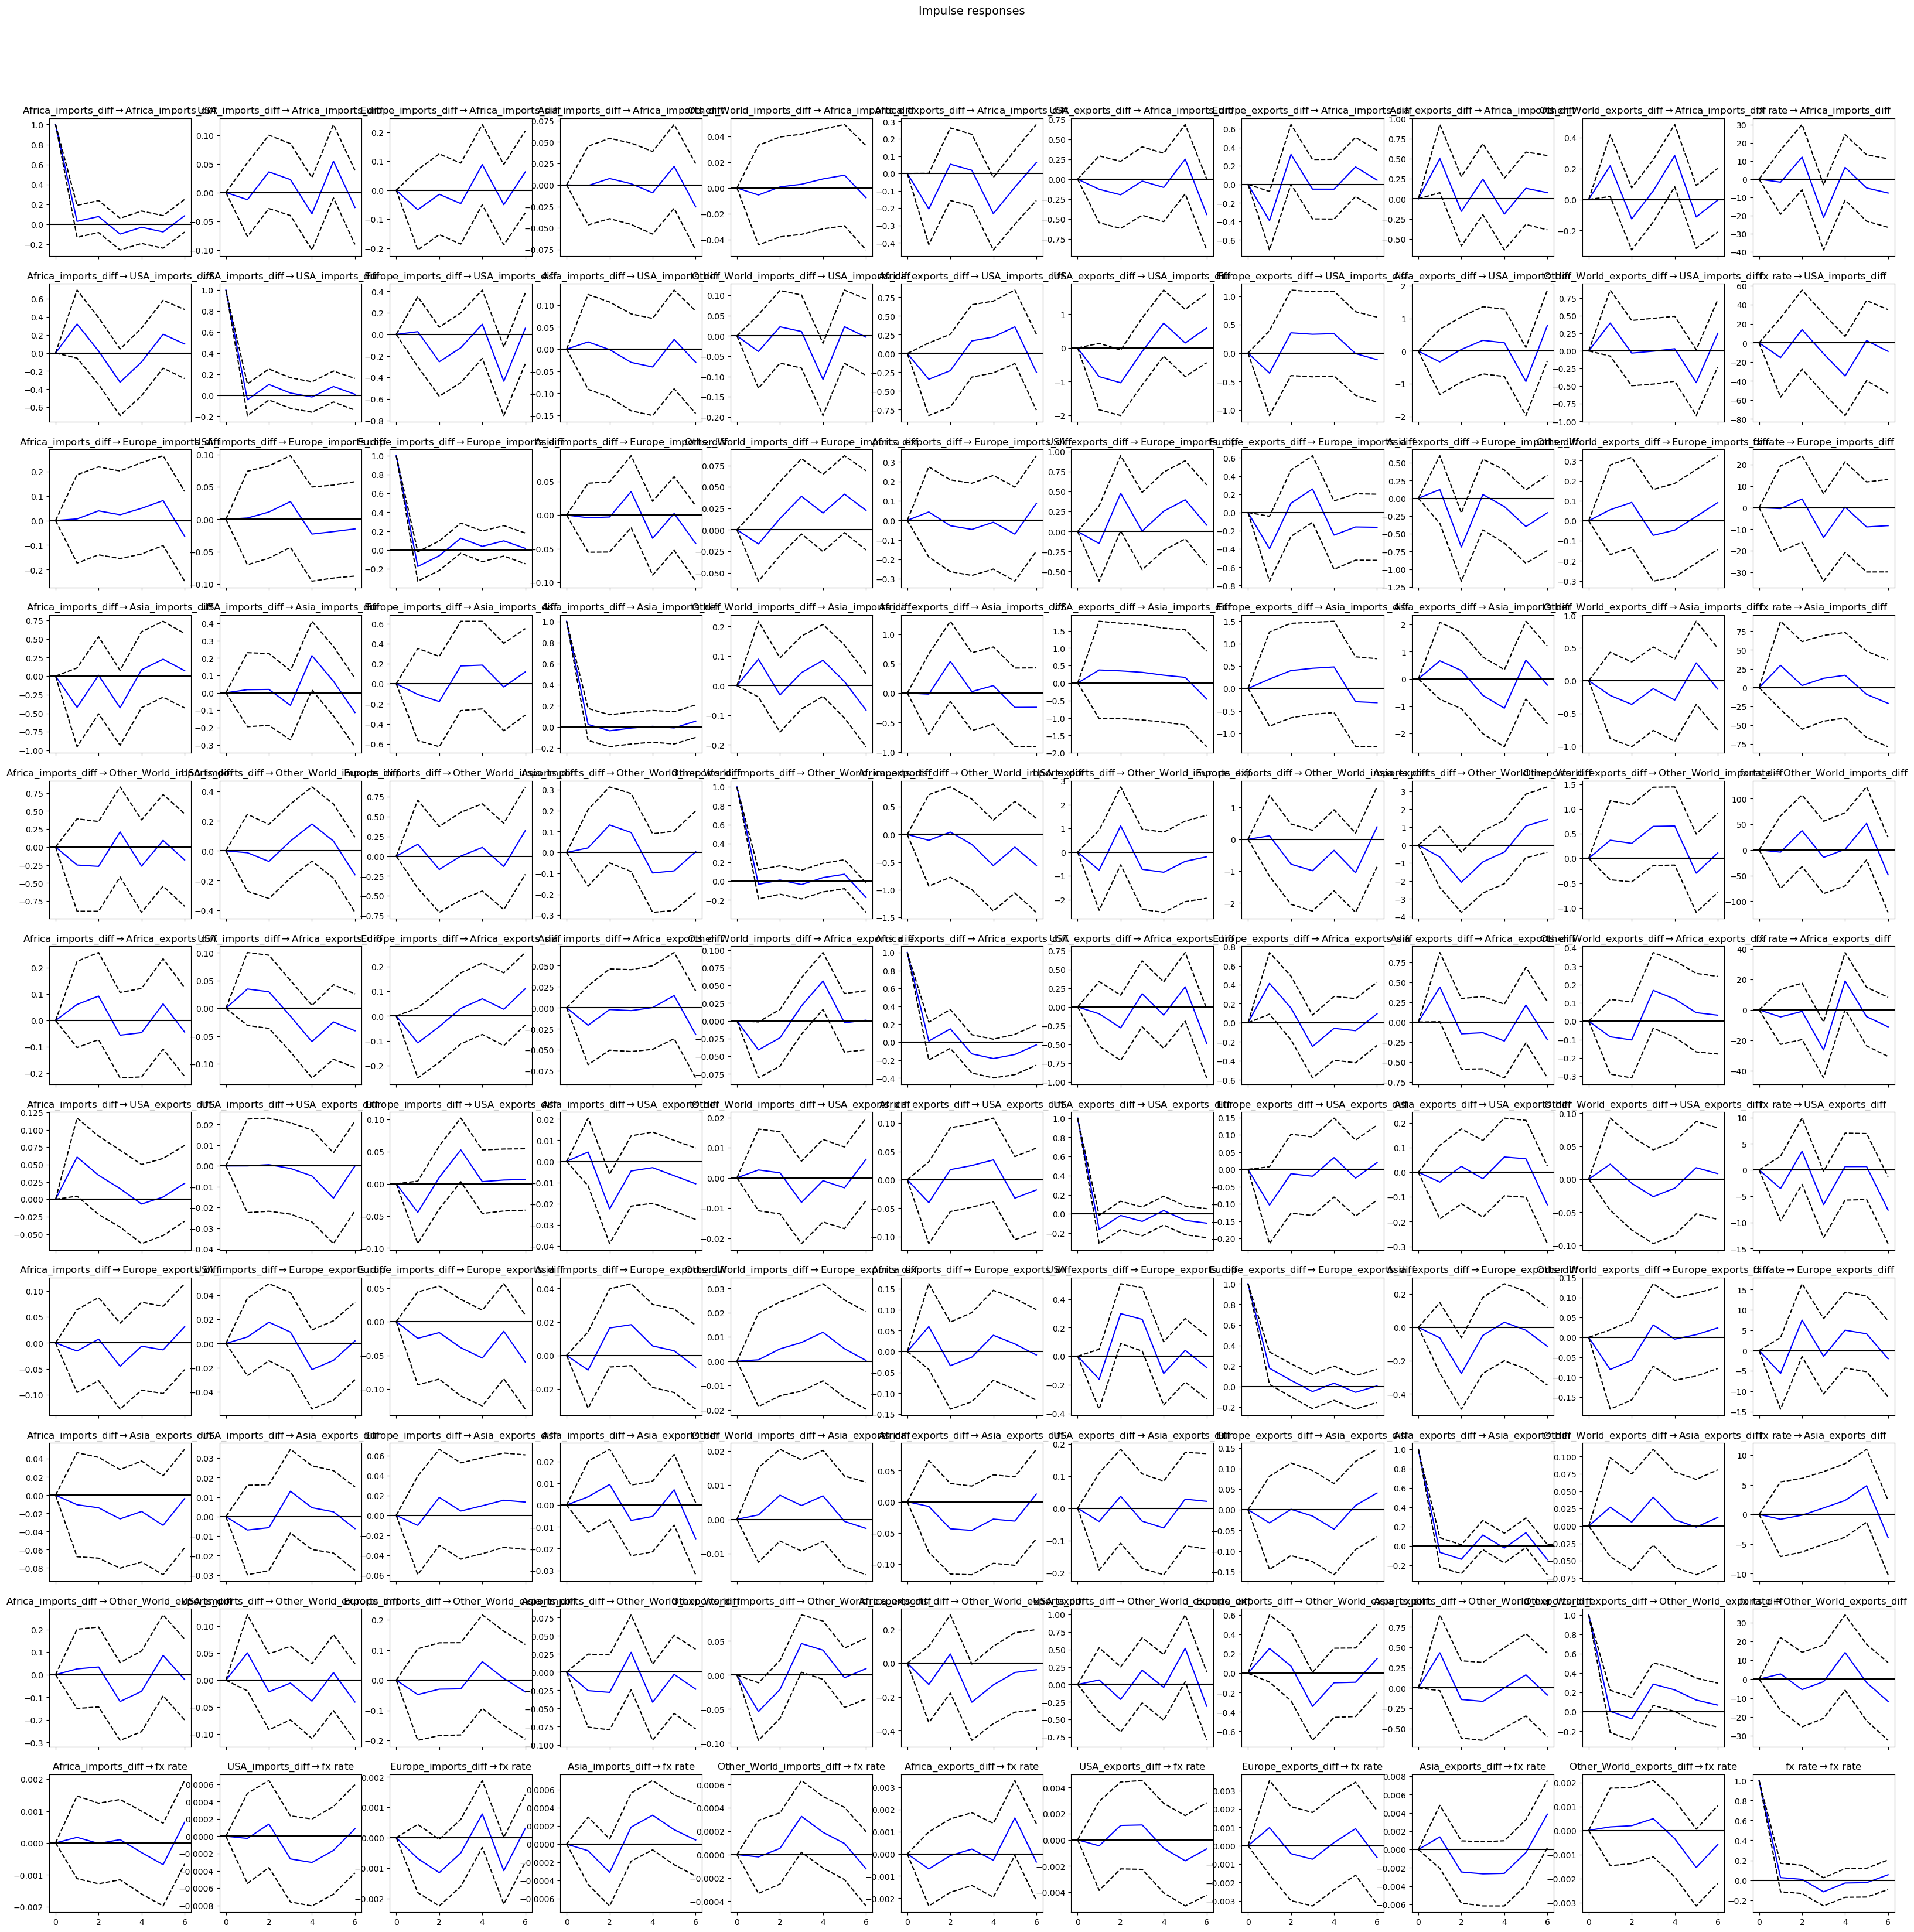

In [30]:
# Getting the lags used in the model
lag = results.k_ar

# Impulse response function
# Compute impulse response function
irf = results.irf(lag)
# Plot impulse response functions
irf.plot(figsize=(35,35)) #impulse='Africa_imports_dif
plt.show()


In [42]:

# Reshape the 3D array into a 2D array
array_2d = values.reshape(values.shape[0], -1)

# Convert the 2D array into a DataFrame
df = pd.DataFrame(array_2d)

# Display the DataFrame
df.iloc[:,110:]


,110,111,112,113,114,115,116,117,118,119,120
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.000176,-0.000025,-0.000685,-0.000073,-0.000020,-0.000679,-0.000456,0.000983,0.001382,0.000147,0.026145
2,-0.000017,0.000140,-0.001151,-0.000313,0.000053,-0.000079,0.001103,-0.000435,-0.002454,0.000197,0.008204
3,0.000103,-0.000262,-0.000502,0.000187,0.000327,0.000214,0.001140,-0.000740,-0.002657,0.000490,-0.117065
4,-0.000303,-0.000303,0.000780,0.000318,0.000191,-0.000289,-0.000632,0.000170,-0.002603,-0.000343,-0.028348
5,-0.000682,-0.000164,-0.001086,0.000158,0.000095,0.001618,-0.001603,0.000926,-0.000328,-0.001545,-0.024905
6,0.000650,0.000086,0.000306,0.000045,-0.000122,-0.000369,-0.000693,-0.000642,0.003861,-0.000588,0.054534
